Dataset Kaggle : https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp

In [29]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Question_Classification_Dataset.csv")
df = df.drop(columns=['Unnamed: 0', 'Category1', 'Category2'])

df.head()

,Questions,Category0
0,How did serfdom develop in and then leave Russ...,DESCRIPTION
1,What films featured the character Popeye Doyle ?,ENTITY
2,How can I find a list of celebrities ' real na...,DESCRIPTION
3,What fowl grabs the spotlight after the Chines...,ENTITY
4,What is the full form of .com ?,ABBREVIATION


In [31]:
df = df.drop(df[df['Category0'] == 'ENTITY'].index)
df = df.drop(df[df['Category0'] == 'ABBREVIATION'].index)

In [32]:
model_category = pd.get_dummies(df.Category0)
new_ds         = pd.concat([df,model_category], axis=1)
new_ds         = new_ds.drop(columns='Category0')
new_ds

,Questions,DESCRIPTION,HUMAN,LOCATION,NUMERIC
0,How did serfdom develop in and then leave Russ...,1,0,0,0
2,How can I find a list of celebrities ' real na...,1,0,0,0
5,What contemptible scoundrel stole the cork fro...,0,1,0,0
6,What team did baseball 's St. Louis Browns bec...,0,1,0,0
7,What is the oldest profession ?,0,1,0,0
...,...,...,...,...,...
5443,Where can I find information on becoming a jou...,0,0,1,0
5445,In what city does Maurizio Pellegrin now live ?,0,0,1,0
5446,Who was Buffalo Bill ?,0,1,0,0
5449,What is the temperature today ?,0,0,0,1


In [33]:
X_column  = new_ds['Questions'].astype(str)
Y_column  = new_ds[['DESCRIPTION','LOCATION','HUMAN','NUMERIC']]

X_train, X_test, y_train, y_test = train_test_split(X_column,Y_column,test_size=0.2)

In [34]:
getTokenizer = Tokenizer(num_words=5000, oov_token='x')
getTokenizer.fit_on_texts(X_train)
getTokenizer.fit_on_texts(X_test)

In [35]:
A_train      = getTokenizer.texts_to_sequences(X_train)
A_test        = getTokenizer.texts_to_sequences(X_test)

In [36]:
B_train      = pad_sequences(A_train)
B_test       = pad_sequences(A_test)

In [37]:
model_ = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.75),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.75),
    tf.keras.layers.Dense(4,activation='softmax')
])


model_.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('val_accuracy') > 0.9):
      print("\n Akurasi lebih dari 90%")
      self.model.stop_training = True

callbacks = myCallback()

num_of_epochs = 30

history_ = model_.fit(B_train, y_train, epochs=num_of_epochs, callbacks=[callbacks], validation_data=(B_test, y_test), verbose=2)

Epoch 1/30
103/103 - 9s - loss: 1.3790 - accuracy: 0.2837 - val_loss: 1.3601 - val_accuracy: 0.4102 - 9s/epoch - 84ms/step
Epoch 2/30
103/103 - 6s - loss: 1.1897 - accuracy: 0.4669 - val_loss: 0.9636 - val_accuracy: 0.6444 - 6s/epoch - 61ms/step
Epoch 3/30
103/103 - 4s - loss: 0.8221 - accuracy: 0.6604 - val_loss: 0.6802 - val_accuracy: 0.6905 - 4s/epoch - 43ms/step
Epoch 4/30
103/103 - 5s - loss: 0.5572 - accuracy: 0.7622 - val_loss: 0.5998 - val_accuracy: 0.7791 - 5s/epoch - 45ms/step
Epoch 5/30
103/103 - 6s - loss: 0.4057 - accuracy: 0.8515 - val_loss: 0.5924 - val_accuracy: 0.8265 - 6s/epoch - 62ms/step
Epoch 6/30
103/103 - 5s - loss: 0.3224 - accuracy: 0.9010 - val_loss: 0.5807 - val_accuracy: 0.8459 - 5s/epoch - 45ms/step
Epoch 7/30
103/103 - 6s - loss: 0.2250 - accuracy: 0.9310 - val_loss: 0.6734 - val_accuracy: 0.8495 - 6s/epoch - 61ms/step
Epoch 8/30
103/103 - 5s - loss: 0.2756 - accuracy: 0.9244 - val_loss: 0.6688 - val_accuracy: 0.8544 - 5s/epoch - 50ms/step
Epoch 9/30
103/1

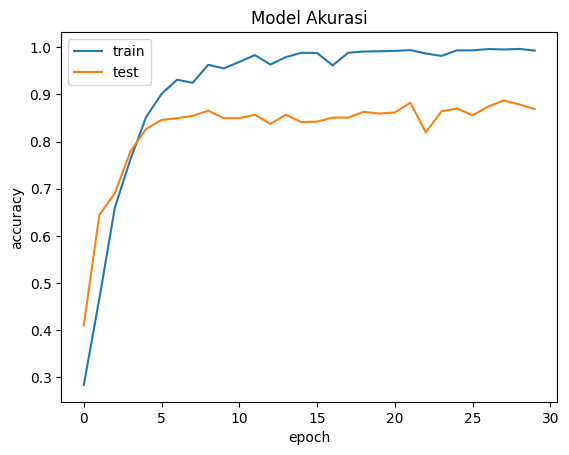

In [40]:
import matplotlib.pyplot as plt
plt.plot(history_.history['accuracy'])
plt.plot(history_.history['val_accuracy'])
plt.title('Model Akurasi')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

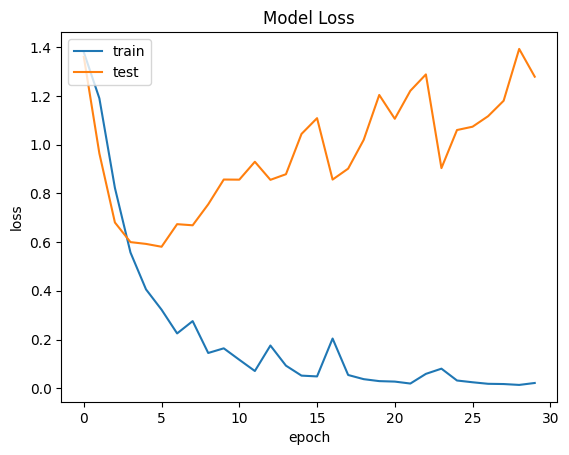

In [41]:
plt.plot(history_.history['loss'])
plt.plot(history_.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()